In [2]:
#Part1: Use any software to obtain the sample mean and sample standard deviation for 
#each random variable (column) of the data; the sample correlations among each pair of the four 
#random variables (columns) of the data.

#https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

df= pd.read_excel("C:/Users/deeps/OneDrive/Desktop/Ms/1sem/Stats/Project/data.xlsx")
print(np.mean(df.Close_ETF))
print(np.std(df.Close_ETF))
print(np.mean(df.oil))
print(np.std(df.oil))
print(np.mean(df.gold))
print(np.std(df.gold))
print(np.mean(df.JPM))
print(np.std(df.JPM))



#Calculate covariance
#The only difference between variance and covariance is using the values and means of two variables instead of one.
covariance=np.cov(df.Close_ETF,df.oil)
print("\nCovariance is"+str(covariance)) # Shows that the non-diagnoal elements are negetively correlated. [var covar]
                                                                                                        #[var covar]   
corr,_=pearsonr(df.Close_ETF,df.oil)
print("\nCorrelation value is:"+str(corr)) # Negetively correlated

if '-' in str(corr):
    print("Negetively Correlated")
elif(corr==0):
    print("No Correlation")
else:
    print("Positively correlated")

121.1529600120001
12.563503845944297
0.0010300354937470015
0.021082349463798354
0.0006628360819999998
0.011283414317347945
0.0005304110210000002
0.011011052723643009

Covariance is[[ 1.57999629e+02 -2.39808892e-03]
 [-2.39808892e-03  4.44910369e-04]]

Correlation value is:-0.00904484200962209
Negetively Correlated


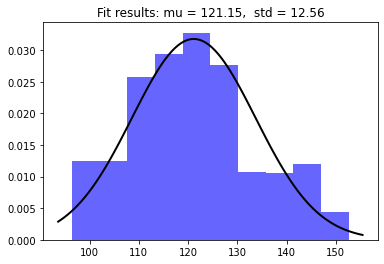

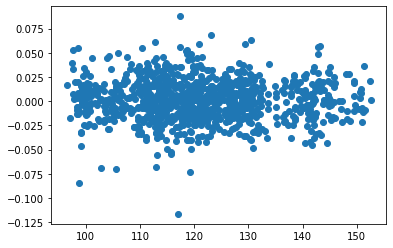

In [92]:
#Part2: Describe your data.
#1.Histogram for each column
#2.A time series plot for each column
#3.A time series plot for all four columns
#4.Three scatter plots to describe the relationships between the ETF column and the OIL 
#column; between the ETF column and the GOLD column; between the ETF column and 
#the JPM column, respectively

#1.Histogram , similarly can do for other columns.
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn import preprocessing


# Generate some data for this demonstration.

data=df.Close_ETF
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #evenly spaced numbers over interval
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

#2.

data.plot(label="Close_ETF")
plt.xlim([1,1000])
plt.legend(loc='lower right')

#3.
#Close_ETF is in a diffrent scale, so need to scale it down it.

data.plot(label="Close_ETF")
df.oil.plot(secondary_y=True,label="Oil")
df.gold.plot(secondary_y=True,label="Gold")
df.JPM.plot(secondary_y=True,label="JPM")
plt.xlim([1,1000])
plt.legend(loc='lower right')

#4.
plt.clf() #Uncomment to view the time-series
plt.scatter(df.Close_ETF,df.oil)

In [3]:
#Part 3:What distribution does your data follow(Propose a Hypothesis.)
#Ho: The distribution of data is normal
#Ha: The distribution of data is not normal(It is either left skewed or right skewed)

from scipy import stats
shapiro_test,p=stats.shapiro(df.Close_ETF)
print(p)

alpha=0.05

if p>alpha:
    print("Fail to reject H0");
else:
    print("Reject H0");
    
    #Similarly can be done for Shapiro,Anderson and kstest these are hypothesis tests.

1.1652731557454388e-10
Reject H0


In [13]:
#Part 4:Break your data into small groups and let them discuss the importance of the 
#Central Limit Theorem

#In central limit theorm , the histgram plotted must look like normal distribution it shouldnt left or right skewed.
#1. Sequential Sampling
indexSize=df.count()/20 ; #for spilling every index by 20
x=0
y=20
histogram={}

for i in range(0,int(indexSize.Close_ETF)):
    app1=df.iloc[x:y:]
    x+=20
    y+=20
    histogram[i]=app1.Close_ETF.mean()
    
plt.hist(list(histogram.values()))     #Looks left skewed so is not consistent with cetral limit theorm.

#2. Random Sampling
import random
import statistics
population = df.Close_ETF.tolist()
sampleSize =20
noSamples=50

for x in range(noSamples):
    sample=random.sample(population,sampleSize)
    #print("Mean:"+ str(statistics.mean(sample)))
    fig1=plt.figure()
    ax1=fig1.add_subplot()
    ax1.hist(sample)
    


In [4]:
#Part-5 Construct a confident interval with the data.
#The confidence interval for the mean is range of values that is likley to contain the population mean with certain level of confidence.
#Confidence intervals measure the degree of uncertainty or certainty in a sampling method. When we select a sample it will make sure the sample mean is present in the population mean , so the sample is stable.

import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a) # n-1 is degrees of freedom
    m, se = np.mean(a), scipy.stats.sem(a) #sem is standard error of the mean
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) #Compute the t standard variable.
    return m, m-h, m+h

mean_confidence_interval(df.Close_ETF) #Entire population confidence interval

mean_confidence_interval(df.Close_ETF.iloc[0:20:]) #Sample confidence interval (Comment this line to calculate the confidence interval)

#Conclusion:Therefore the sample mean is within the confidence interval for population mean.So sample is stable and accurate

(99.32100080000001, 98.69021744828942, 99.9517841517106)

In [5]:
#Part6 For the hypothesis and test with your data.
#1. We can see that the sample mean=121 , but H0 says mean has to be 100 , so we reject the null hypothesis.
#2.#1. We can see that the sample mean=121 , but H0 says mean has to be 100 , so we reject the null hypothesis.
#3. , 4. Similarly compute for standard deviation and check the value and reject the null hypothesis. 
      # Mean based hyp we can use t-test and variance based we can use chi-square test.
    
    
    

In [6]:
#Part 7: Compare your data with a different data set 
#1. ,2,3 all are same logic.
sampleGold=df.gold
sampleOil=df.oil


meanGold,meanGoldH,meanGoldH2=mean_confidence_interval(sampleGold)
print((meanGold))
meanOil,meanOilH,meanOilH2=mean_confidence_interval(sampleOil)
print((meanOil))

if(meanGold==meanOil):
    print("H0 is accepted")
else:
    print("H0 is rejected")

    #Conclusion , since both the means are not same we reect the null hypothesis.

0.0006628360819999999
0.0010300354937470017
H0 is rejected


(0.022995570076054607, 0.46761178061829667)
R squared value:0.0005287962431227377


(0.0006628360819999999, -0.0002584729930030417, 0.0015841451570030416)

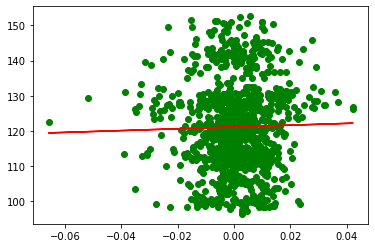

In [63]:
#Part 8: Fitting the line to the data.
#Consider the data including the ETT column and Gold column only. Using any software

#1. Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between 
#them which can be observed from the scatter plot?
import matplotlib.pyplot as plt
import numpy as np

etf=df.Close_ETF
gold=df.gold

#use green as color for individual points
plt.plot(gold, etf, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(gold, etf,1)

#use red as color for regression line
plt.plot(gold, m*gold+b, color='red')

#Conclusion: We can clealy see that there is no-linear relationship between bothe the variables


#2.Calculate the coefficient of correlation between ETF and Gold and interpret it
from scipy.stats import pearsonr
coeff=pearsonr(gold,etf)
print(coeff)

#The range of r is -1 to 1 and it explains a weak positive correlation between the variables.

#3.Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are 
#the intercept and slope of this line? How to interpret them?

#Greater the magnitude of m greater is the slops ,intercept cuts the x-axis as a axis.

#4.Conduct a two-tailed t-test with 𝐻0: 𝛽1 = 0. What is the P-value of the test? Is the linear 
#relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? 
from scipy import stats
stats.ttest_ind(df.gold,df.Close_ETF)

#Conclusion:Here p value =0 > 0.01 , so we reject the null hypothesis.

#5.Suppose that you use the coefficient of determination to assess the quality of this fitting. 
#Is it a good model? Why or why not?
#The co-efficient of determination which is r-squared value 


correlation_matrix = np.corrcoef(df.gold,df.Close_ETF)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R squared value:"+str(r_squared))

#Conclusion: Here we can see that the r-squared value lies between 0 and 1 , but close to 0 so model is not a goof fit.

#6.The assumption made in order to fit the model was that there existed a linear relat
#ionship between the variables, i.e. fitting a linear model is the underlying assumpti
#on here

#7.Given the daily relative change in the gold price is 0.005127. Calculate the 99% 
#confidence interval of the mean daily ETF return, and the 99% prediction interval of the 
#individual daily ETF return
def mean_confidence_interval(data, confidence=0.99):
    a = 1.0 * np.array(data)
    n = len(a) # n-1 is degrees of freedom
    m, se = np.mean(a), scipy.stats.sem(a) #sem is standard error of the mean
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) #Compute the t standard variable.
    return m, m-h, m+h

mean_confidence_interval(df.Close_ETF)
mean_confidence_interval(df.gold)

In [10]:
#Part 9:Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple 
#linear regression model to the data with the ETF variable as the response. Evaluate your model 
#with adjusted 𝑅2  ;dependent variable is the ETF and rest are independent variable.
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X=df[['oil','gold','JPM']]
Y=df.Close_ETF  #dependent variable
reg=linear_model.LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.7,random_state=50)
reg.fit(X_train,Y_train)

y_pred=reg.predict(X_test)
#print(y_pred) #Conclusion there is a significant diffrence between what is predicted and present in excel

r2_score(Y_test, y_pred)

#Conclusion , the model is performing bad as the r2_Score is below 0. r2 ranges between 0 and 1 , 0.9 means 90% independent and dependent vraiable can describe.

-0.008293397511050626

In [34]:
#Part 10:Checking residuals and model selection
#A residual is the difference between an observed value and a predicted value in a regression model.
from pandas import DataFrame

residuals = Y_test - y_pred
residuals = DataFrame(residuals)
print(residuals.sum().head())

#Closer the data-point to 0 , better the fit , here it is greater so model is not good. So this is not a good model.





Close_ETF    518.810287
dtype: float64
